[link text]# Heart Attack Analysis & Prediction

# Part 0:  Data Collection


In [71]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [72]:

id = "13vcS5fSUneJF5z6f1Tiome0y69fYX5cl"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('heart.csv')

In [73]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Part 1: Data Information


### Part 1.1:  the Raw Dataset

In [74]:
import pandas as pd
import numpy as np

heart_df = pd.read_csv('heart.csv')

In [75]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
heart_df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [77]:
# check data info
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [78]:
# check the unique values for each column
heart_df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

## Part 1.2 : Remove the outliers

In [79]:
heart_df = heart_df.drop([1,2,36,49,86,98,102,104,111,137,145,151,159,164, 165, 205, 216, 221, 224, 239, 248, 249,252, 253 ,255, 260, 261, 267, 273, 282, 292, 293, 296, 298])

In [80]:
#check distribution on output
heart_df['output'].value_counts()

1    151
0    118
Name: output, dtype: int64

In [81]:
# check data info
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       269 non-null    int64  
 1   sex       269 non-null    int64  
 2   cp        269 non-null    int64  
 3   trtbps    269 non-null    int64  
 4   chol      269 non-null    int64  
 5   fbs       269 non-null    int64  
 6   restecg   269 non-null    int64  
 7   thalachh  269 non-null    int64  
 8   exng      269 non-null    int64  
 9   oldpeak   269 non-null    float64
 10  slp       269 non-null    int64  
 11  caa       269 non-null    int64  
 12  thall     269 non-null    int64  
 13  output    269 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.5 KB


In [82]:
# Get target variable
y = heart_df['output']

### Part 1.3:  examine the features

In [83]:
# check missing values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [84]:
# Numerical feature
heart_df[['age','trtbps', 'chol', 'thalachh', 'oldpeak']].describe()

,age,trtbps,chol,thalachh,oldpeak
count,269.000000,269.000000,269.000000,269.000000,269.000000
mean,54.122677,131.197026,247.598513,149.843866,1.046840
std,8.971129,17.182358,52.333340,22.806244,1.146165
min,29.000000,94.000000,131.000000,71.000000,0.000000
25%,47.000000,120.000000,211.000000,136.000000,0.000000
50%,55.000000,130.000000,243.000000,153.000000,0.800000
75%,60.000000,140.000000,274.000000,167.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [85]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

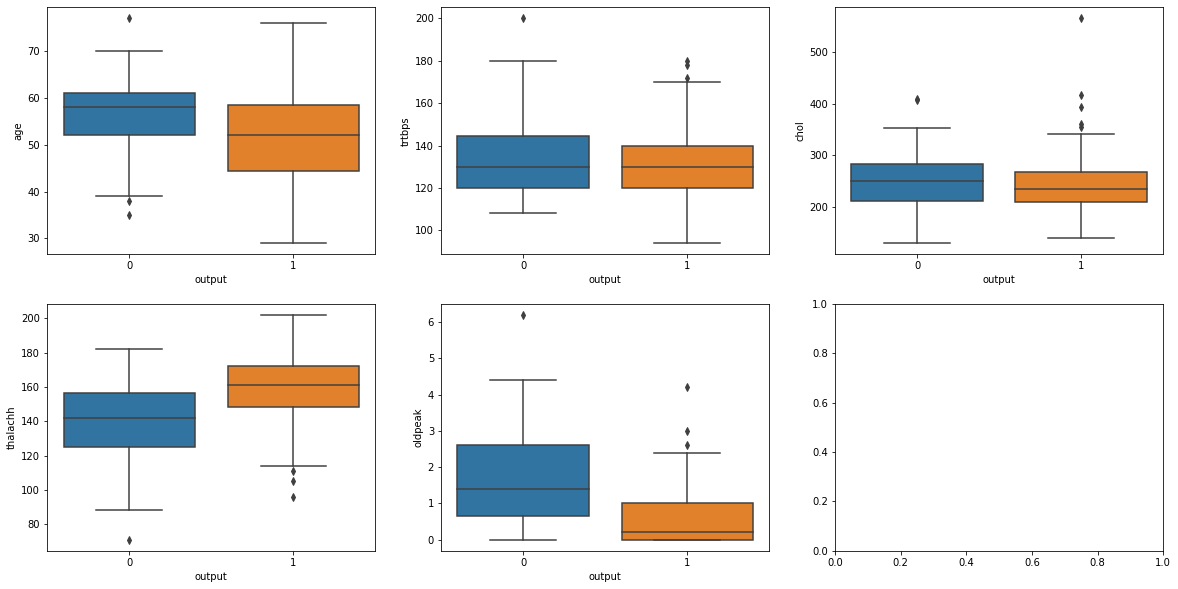

In [86]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='output', y ='age', data=heart_df, ax=axss[0][0])
sns.boxplot(x='output', y ='trtbps', data=heart_df, ax=axss[0][1])
sns.boxplot(x='output', y ='chol', data=heart_df, ax=axss[0][2])
sns.boxplot(x='output', y ='thalachh', data=heart_df, ax=axss[1][0])
sns.boxplot(x='output', y ='oldpeak', data=heart_df, ax=axss[1][1])

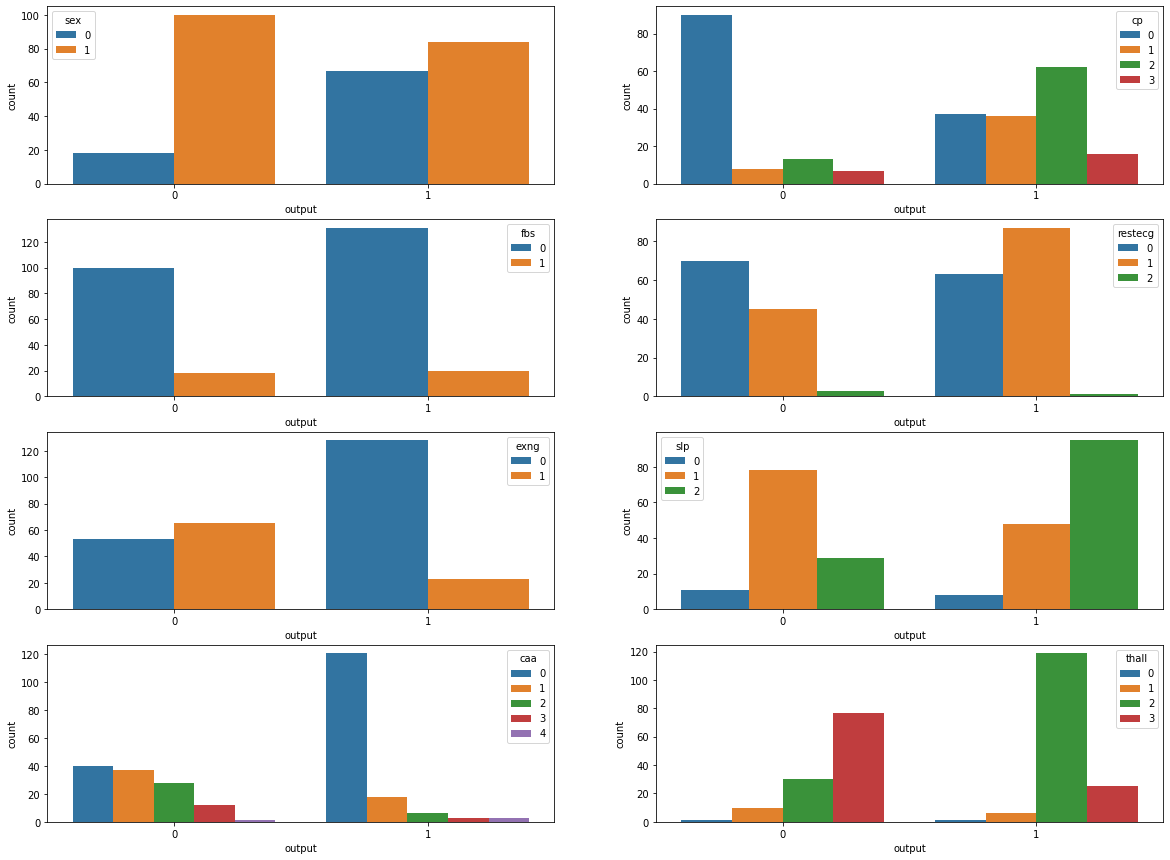

In [87]:
# categorical feature
_,axss = plt.subplots(4,2, figsize=[20,15])
sns.countplot(x='output', hue='sex', data=heart_df, ax=axss[0][0])
sns.countplot(x='output', hue='cp', data=heart_df, ax=axss[0][1])
sns.countplot(x='output', hue='fbs', data=heart_df, ax=axss[1][0])
sns.countplot(x='output', hue='restecg', data=heart_df, ax=axss[1][1])
sns.countplot(x='output', hue='exng', data=heart_df, ax=axss[2][0])
sns.countplot(x='output', hue='slp', data=heart_df, ax=axss[2][1])
sns.countplot(x='output', hue='caa', data=heart_df, ax=axss[3][0])
sns.countplot(x='output', hue='thall', data=heart_df, ax=axss[3][1])

# Part 2: Feature Preprocessing

In [88]:
# Get feature space by dropping useless feature and output, but all useful here
to_drop = ['output']
X = heart_df.drop(to_drop, axis=1)

In [89]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2


In [90]:
X.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
dtype: object

In [91]:
cat_cols = X.columns[X.columns.isin(['sex','cp','fbs','restecg','exng','slp','caa','thall'])]
num_cols = X.columns[~X.columns.isin(['sex','cp','fbs','restecg','exng','slp','caa','thall'])]

In [92]:
cat_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], dtype='object')

In [93]:
num_cols

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], dtype='object')

Split dataset

In [94]:
# Splite data into training and testing

from sklearn import model_selection

# Reserve 25% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 201 observation with 13 features
test data has 68 observation with 13 features


In [95]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3


In [96]:
# One hot encoding

from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['sex','cp','fbs','restecg','exng']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [97]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,slp,caa,thall,sex_0,sex_1,...,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,exng_1
0,51,140,299,173,1.6,2,0,3,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,41,135,203,132,0.0,1,0,1,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,52,172,199,162,0.5,2,0,3,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,59,140,177,162,0.0,2,1,3,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,70,160,269,112,2.9,1,1,3,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [98]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

ordinals = ['slp','caa','thall']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[ordinals])

X_train[ordinals] = enc_oe.transform(X_train[ordinals])
X_test[ordinals] = enc_oe.transform(X_test[ordinals])

In [99]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,slp,caa,thall,sex_0,sex_1,...,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,exng_1
0,51,140,299,173,1.6,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,41,135,203,132,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,52,172,199,162,0.5,2.0,0.0,3.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,59,140,177,162,0.0,2.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,70,160,269,112,2.9,1.0,1.0,3.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Standardize/Normalize Data

In [100]:
# Scale the data, using standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [101]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,slp,caa,thall,sex_0,sex_1,...,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,exng_1
0,-0.317326,0.538739,1.111633,1.014098,0.449329,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.487647,0.241575,-0.869532,-0.824666,-0.915205,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.200294,2.440588,-0.952080,0.520771,-0.488788,2.0,0.0,3.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.618931,0.538739,-1.406097,0.520771,-0.915205,2.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.906284,1.727394,0.492519,-1.721623,1.558013,1.0,1.0,3.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training

In [102]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [103]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [104]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0])

In [105]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8823529411764706

In [106]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.82926829 0.875      0.725      0.825      0.825     ]
Model accuracy of Logistic Regression is 0.8158536585365853
[0.70731707 0.875      0.775      0.8        0.825     ]
Model accuracy of KNN is 0.7964634146341464
[0.80487805 0.9        0.8        0.925      0.825     ]
Model accuracy of Random Forest is 0.8509756097560975


### (Optional) Part 3.2: Use Grid Search to Find Optimal Hyperparameters
alternative: random search

In [107]:
#Loss/cost function --> (wx + b - y) ^2 + ƛ * |w| --> ƛ is a hyperparameter

In [108]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.2.1: Find Optimal Hyperparameters - LogisticRegression

In [109]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [110]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8113414634146341
Best parameters set:
C:0.2
penalty:l1


In [111]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [112]:
best_LR_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0])

In [113]:
best_LR_model.score(X_test, y_test)

0.8088235294117647

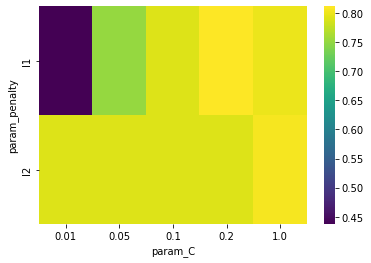

In [114]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

#### Part 3.2.2: Find Optimal Hyperparameters: KNN

In [115]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [116]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8012195121951219
Best parameters set:
n_neighbors:1


In [117]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [118]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [119]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8609756097560975
Best parameters set:
max_depth:10
n_estimators:100


In [120]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [121]:
best_RF_model

RandomForestClassifier(max_depth=10)

####Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [123]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8382352941176471
precision is: 0.8292682926829268
recall is: 0.8947368421052632

Logistic Regression
Accuracy is: 0.8088235294117647
precision is: 0.8048780487804879
recall is: 0.868421052631579

K nearest neighbor
Accuracy is: 0.7647058823529411
precision is: 0.7619047619047619
recall is: 0.8421052631578947



### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model

In [124]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [125]:
best_RF_model.predict_proba(X_test)

array([[0.09      , 0.91      ],
       [0.39      , 0.61      ],
       [0.04090909, 0.95909091],
       [0.455     , 0.545     ],
       [0.24      , 0.76      ],
       [0.08833333, 0.91166667],
       [0.03090909, 0.96909091],
       [0.        , 1.        ],
       [0.2975    , 0.7025    ],
       [0.2725    , 0.7275    ],
       [0.11090909, 0.88909091],
       [0.45      , 0.55      ],
       [0.64      , 0.36      ],
       [0.55      , 0.45      ],
       [0.27      , 0.73      ],
       [0.85      , 0.15      ],
       [0.02333333, 0.97666667],
       [0.92      , 0.08      ],
       [0.79      , 0.21      ],
       [0.02      , 0.98      ],
       [0.06840909, 0.93159091],
       [0.87      , 0.13      ],
       [0.15      , 0.85      ],
       [0.95      , 0.05      ],
       [0.01090909, 0.98909091],
       [0.06733333, 0.93266667],
       [0.83      , 0.17      ],
       [0.03833333, 0.96166667],
       [0.28      , 0.72      ],
       [0.1       , 0.9       ],
       [0.

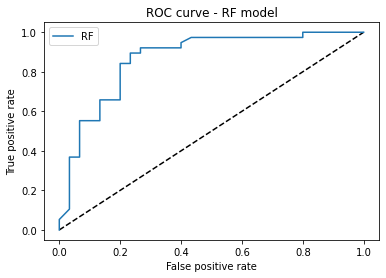

In [126]:
# ROC curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [127]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8653508771929825

#### Part 3.4.1: ROC of LR Model

In [128]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [129]:
best_LR_model.predict_proba(X_test)

array([[0.0805663 , 0.9194337 ],
       [0.15086156, 0.84913844],
       [0.17890182, 0.82109818],
       [0.43986529, 0.56013471],
       [0.20418006, 0.79581994],
       [0.10575215, 0.89424785],
       [0.12897138, 0.87102862],
       [0.09128307, 0.90871693],
       [0.19997423, 0.80002577],
       [0.17695103, 0.82304897],
       [0.16719543, 0.83280457],
       [0.11557668, 0.88442332],
       [0.46111177, 0.53888823],
       [0.46329408, 0.53670592],
       [0.26380481, 0.73619519],
       [0.84512778, 0.15487222],
       [0.14196631, 0.85803369],
       [0.87442968, 0.12557032],
       [0.78064378, 0.21935622],
       [0.13435143, 0.86564857],
       [0.12897138, 0.87102862],
       [0.89292962, 0.10707038],
       [0.28197833, 0.71802167],
       [0.95028816, 0.04971184],
       [0.09463679, 0.90536321],
       [0.29589963, 0.70410037],
       [0.74339052, 0.25660948],
       [0.16649866, 0.83350134],
       [0.43075237, 0.56924763],
       [0.13042713, 0.86957287],
       [0.

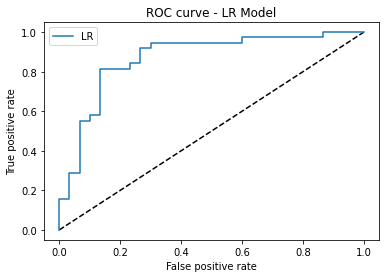

In [130]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [131]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8701754385964913

# Part 4: Model additional Functionality

## Part 4.1:  Logistic Regression Model


In [132]:
X_with_corr = X.copy()
X_with_corr = OneHotEncoding(X_with_corr, enc_ohe, categories)
X_with_corr[ordinals] = enc_oe.transform(X_with_corr[ordinals])
X_with_corr.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,trtbps,chol,thalachh,oldpeak,slp,caa,thall,sex_0,sex_1,...,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,exng_1
0,63,145,233,150,2.3,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,56,120,236,178,0.8,2.0,0.0,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,57,120,354,163,0.6,2.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,57,140,192,148,0.4,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,56,140,294,153,1.3,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [133]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.04, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
cp_0 : -0.4346
oldpeak : -0.3543
caa : -0.2125
exng_0 : 0.1203
thalachh : 0.1117
sex_1 : -0.1015
thall : -0.0938
sex_0 : 0.0034
trtbps : 0.0
chol : 0.0
slp : 0.0
exng_1 : 0.0
cp_1 : 0.0
cp_2 : 0.0
cp_3 : 0.0
fbs_0 : 0.0
fbs_1 : 0.0
restecg_0 : 0.0
restecg_1 : 0.0
restecg_2 : 0.0
age : 0.0


In [134]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
caa : -0.53
oldpeak : -0.4797
cp_0 : -0.4211
thall : -0.3846
sex_0 : 0.3314
sex_1 : -0.3314
cp_2 : 0.3218
thalachh : 0.2941
slp : 0.2528
exng_0 : 0.1908
exng_1 : -0.1908
cp_3 : 0.1887
trtbps : -0.1886
chol : -0.1728
restecg_1 : 0.1275
restecg_0 : -0.1096
restecg_2 : -0.0737
age : -0.0675
cp_1 : 0.0356
fbs_0 : -0.014
fbs_1 : 0.014


## Part 4.2  Random Forest Model - Feature Importance

In [135]:
X_RF = X.copy()
X_RF.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2


In [136]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
oldpeak : 0.1365
cp : 0.1348
thalachh : 0.1181
thall : 0.1137
caa : 0.1131
age : 0.0856
chol : 0.0786
trtbps : 0.074
exng : 0.0431
sex : 0.0374
slp : 0.0366
restecg : 0.0194
fbs : 0.0092


In [140]:
#Random forest with feature encoding
X_RF2 = X.copy()
X_RF2 = OneHotEncoding(X_RF2, enc_ohe, categories)
X_RF2[ordinals] = enc_oe.transform(X_RF2[ordinals])
X_RF2.head()
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF2.columns[indices[ind]],round(importances[indices[ind]], 4)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Feature importance ranking by Random Forest Model:
sex_1 : 0.1228
cp_2 : 0.1219
cp_1 : 0.1204
chol : 0.1173
thall : 0.1073
age : 0.0855
thalachh : 0.0762
oldpeak : 0.0743
sex_0 : 0.0503
cp_0 : 0.0502
trtbps : 0.0391
caa : 0.0246
slp : 0.0102
